# CLUSTERING SOLAR ENERGY PRODUCTION ZONES

## OBJECTIVE

This project aims to leverage data containing information on existing solar power projects within the target area. Through the analysis of this data, our goal is to group(cluster) geographical areas based on their overall energy production.

## DATASET OVERVIEW

dataset used for model building contained 218115 rows of 17 columns. The data contains the following information:

| Variable| Description|
| ---|----|
|Data Through Date| The date up to which the data in the dataset is valid or relevant|
|Project ID| A unique identifier for each solar power project in the dataset|
|Interconnection Date| The date when the solar power project was connected to the grid or power distribution system|
|Utility| The utility company or organization responsible for managing the power grid and distributing electricity|
|City/Town| The location of the solar power project (city or town)|
|County| The administrative division within the state where the solar project is situated|
|Zip| The postal code or ZIP code corresponding to the project’s location|
|Division| A further geographical subdivision within the state (if applicable)|
|Substation| The electrical substation where the solar power project is connected to the grid|
|Circuit ID| The unique identifier for the circuit within the substation that the solar project is connected to|
|Developer| The entity or organization responsible for developing and implementing the solar power project|
|Metering Method| The method used to measure and record the solar energy production (e.g., net metering, gross metering)|
|Estimated PV System Size (kWdc)| The estimated size of the photovoltaic (PV) system in kilowatts direct current (kWdc). This represents the total capacity of the solar panels|
|PV System Size (kWac)| The actual size of the PV system in kilowatts alternating current (kWac). This accounts for system losses and efficiency|
|Estimated Annual PV Energy Production (kWh)| The projected annual energy production from the PV system in kilowatt-hours (kWh). This estimate considers factors like solar irradiance, panel orientation, and efficiency|
|Energy Storage System Size (kWac)| If applicable, the size of any energy storage system (such as batteries) connected to the solar project, measured in kilowatts alternating current (kWac)|
|Number of Projects| The total count of solar power projects represented in the dataset|

## IMPORT LIBRARIES

In [161]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## LOAD DATASET

In [164]:
df=pd.read_csv("C:/Users/LENOVO/clustering solar/OneDrive_1_3-13-2025/Statewide Solar Projects.csv")

## DATA PREPROCESSING

In [167]:
# Display the first five rows of a DataFrame
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [169]:
# checking the details of Dataframe Columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [171]:
# checking the shape of the Data
df.shape

(218115, 17)

In [173]:
# The number of unique values in specification
df.nunique()

Data Through Date                                   1
Project ID                                     218077
Interconnection Date                             5411
Utility                                             7
City/Town                                        3009
County                                             62
Zip                                              1729
Division                                          109
Substation                                       2255
Circuit ID                                       6429
Developer                                        2567
Metering Method                                     6
Estimated PV System Size (kWdc)                  3191
PV System Size (kWac)                            3095
Estimated Annual PV Energy Production (kWh)      3769
Energy Storage System Size (kWac)                 210
Number of Projects                                  1
dtype: int64

In [175]:
# Checking the decriptive statistics of Dataset
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [177]:
# Checking the Missing values in the dataset
df.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [179]:
# DataFrame Null Values as Percentages
null_percentage = df.isnull().mean() * 100
print(null_percentage)

Data Through Date                               0.000000
Project ID                                      0.001375
Interconnection Date                            0.000000
Utility                                         0.000000
City/Town                                       0.026591
County                                          0.000000
Zip                                             0.044013
Division                                       39.077551
Substation                                     36.652225
Circuit ID                                      0.013754
Developer                                       4.836898
Metering Method                                 0.212273
Estimated PV System Size (kWdc)                 0.000000
PV System Size (kWac)                           0.000000
Estimated Annual PV Energy Production (kWh)     0.000000
Energy Storage System Size (kWac)              98.124384
Number of Projects                              0.000000
dtype: float64


### DATA CLEANING

In [182]:
# Since the column Energy Storage System Size (kWac) has 98% missing value we can drop the column
df=df.drop(columns=['Energy Storage System Size (kWac)'])

In [184]:
# drop the missing rows 
df = df.dropna(subset=['Zip','City/Town'])

In [186]:
# fill with random value
import random
df['Developer'].fillna(random.choice(df['Developer'].dropna().unique()), inplace=True)

In [188]:
# fill the missing values in the metering method with mode
df['Metering Method'].fillna(df['Metering Method'].mode()[0], inplace=True)

In [190]:
# Convert numerical columns to float
numeric_columns = ["Estimated Annual PV Energy Production (kWh)", "Estimated PV System Size (kWdc)"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

In [192]:
from sklearn.impute import SimpleImputer

# Fill missing numerical values with median
imputer = SimpleImputer(strategy="median")
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [194]:
# Drop rows with missing county values
df = df.dropna(subset=["County"])

In [196]:
# drop the columns since they are not important for clustering

df=df.drop(columns=['Project ID','Circuit ID','Division','Substation'])


In [197]:
# Checking the Missing values in the dataset
df.isnull().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [200]:
# Number of Duplicated Rows in the Datase
num_duplicated = df.duplicated().sum()
print(f"Number of Duplicated Rows: {num_duplicated}")

Number of Duplicated Rows: 2812


In [201]:
df.drop_duplicates(inplace=True)

In [202]:
df.duplicated().sum()

0

In [204]:
df.shape

(215204, 12)

## EXPLORATORY DATA ANALYSIS

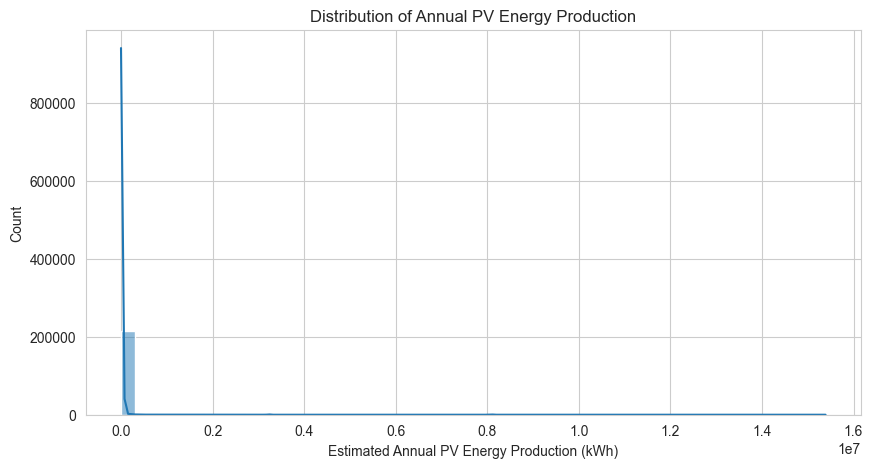

In [207]:
# Set plot style
sns.set_style("whitegrid")

# Histogram of Estimated Annual PV Energy Production
plt.figure(figsize=(10, 5))
sns.histplot(df["Estimated Annual PV Energy Production (kWh)"], bins=50, kde=True)
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Count")
plt.title("Distribution of Annual PV Energy Production")
plt.show()

The histogram shows a right-skewed distribution, meaning most projects produce lower amounts of energy, but there are a few very high-energy-producing projects.

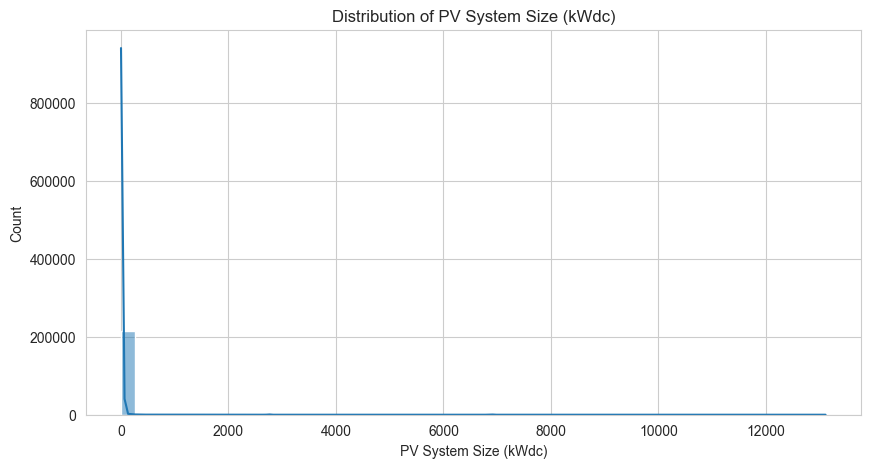

In [210]:
# Set visualization style
sns.set_style("whitegrid")

# Distribution of PV System Size (kWdc)
plt.figure(figsize=(10, 5))
sns.histplot(df["Estimated PV System Size (kWdc)"], bins=50, kde=True)
plt.xlabel("PV System Size (kWdc)")
plt.ylabel("Count")
plt.title("Distribution of PV System Size (kWdc)")
plt.show()

The majority of projects are small-scale, with a right-skewed distribution.
A few projects have extremely large capacities.

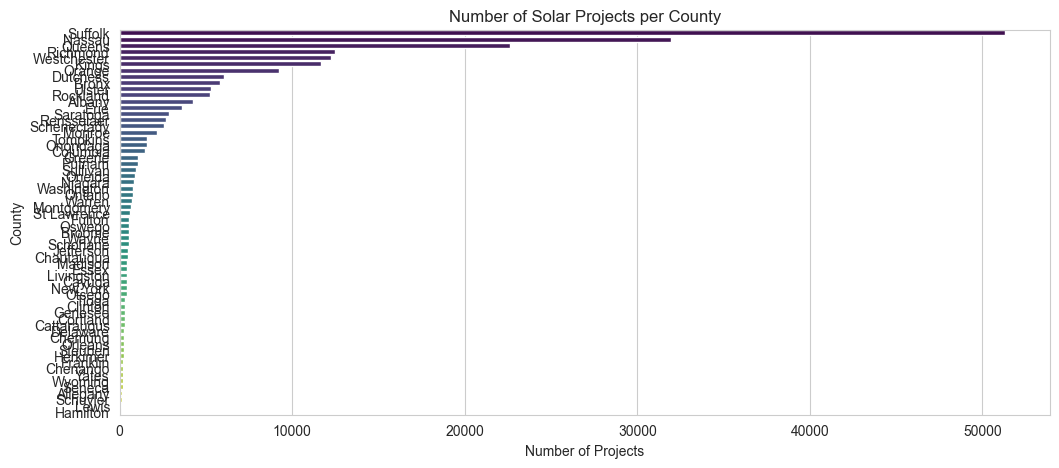

In [213]:
# Count of projects per county
plt.figure(figsize=(12, 5))
sns.countplot(y=df["County"], order=df["County"].value_counts().index, palette="viridis")
plt.xlabel("Number of Projects")
plt.ylabel("County")
plt.title("Number of Solar Projects per County")
plt.show()

Some counties have significantly more solar projects than others.
This could indicate higher solar adoption or better suitability for solar energy in certain regions.

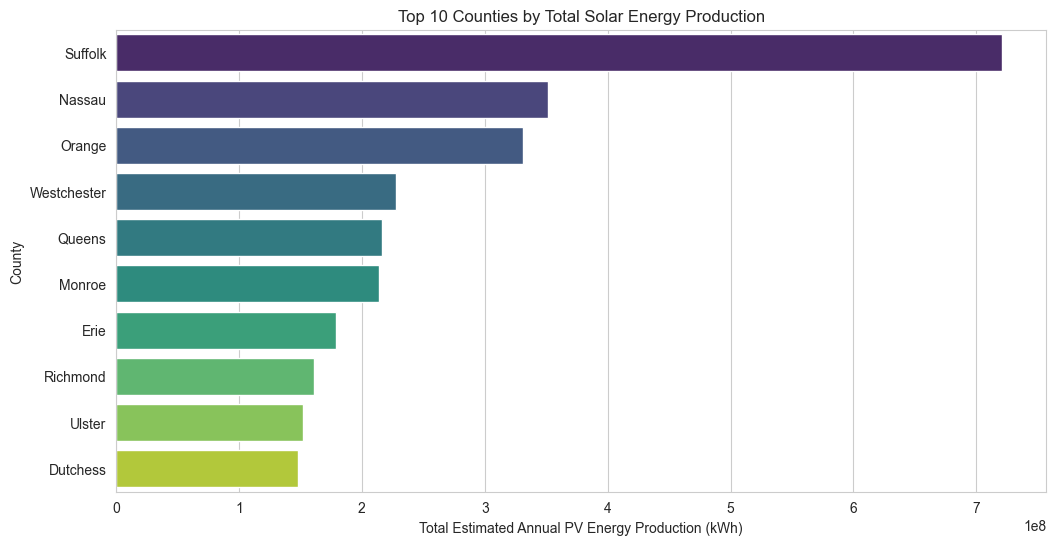

In [215]:
# Aggregate data: Total energy production by county
county_production = df.groupby("County")["Estimated Annual PV Energy Production (kWh)"].sum().reset_index()

# Sort counties by total energy production
county_production = county_production.sort_values(by="Estimated Annual PV Energy Production (kWh)", ascending=False)

# Plot top 10 counties with highest energy production
plt.figure(figsize=(12, 6))
sns.barplot(data=county_production.head(10), 
            x="Estimated Annual PV Energy Production (kWh)", 
            y="County", 
            palette="viridis")

plt.xlabel("Total Estimated Annual PV Energy Production (kWh)")
plt.ylabel("County")
plt.title("Top 10 Counties by Total Solar Energy Production")
plt.show()


The bar chart highlights the top 10 counties with the highest total solar energy production. These counties will likely play a significant role in clustering analysis.

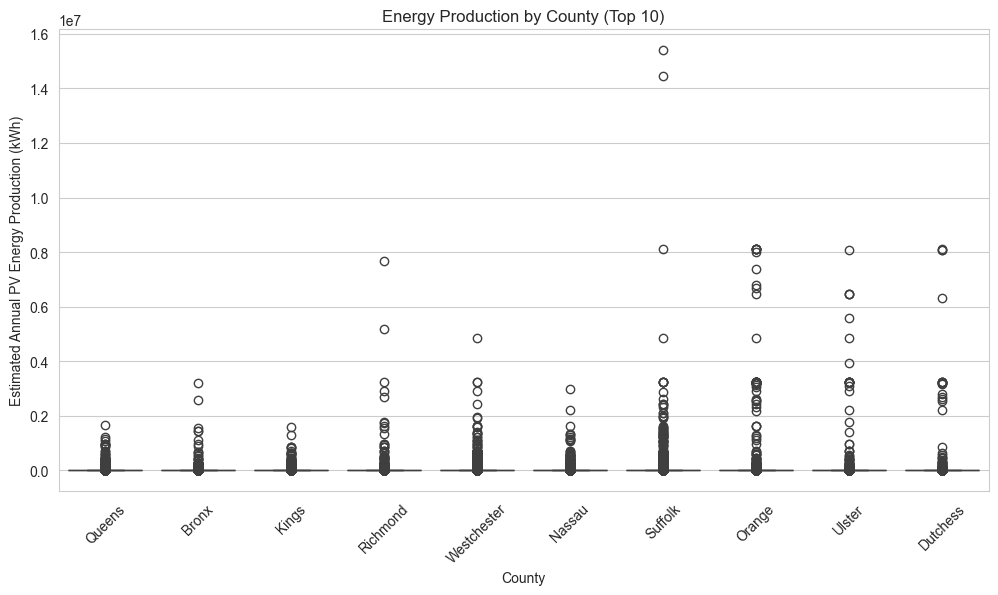

In [217]:
# Boxplot of Energy Production by County (Top 10 counties with most projects)
top_counties = df["County"].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["County"].isin(top_counties)], x="County", y="Estimated Annual PV Energy Production (kWh)")
plt.xticks(rotation=45)
plt.xlabel("County")
plt.ylabel("Estimated Annual PV Energy Production (kWh)")
plt.title("Energy Production by County (Top 10)")
plt.show()

The boxplot reveals significant variation in energy production across different counties.
Some counties have higher median energy production, while others have a wider range with many outliers.

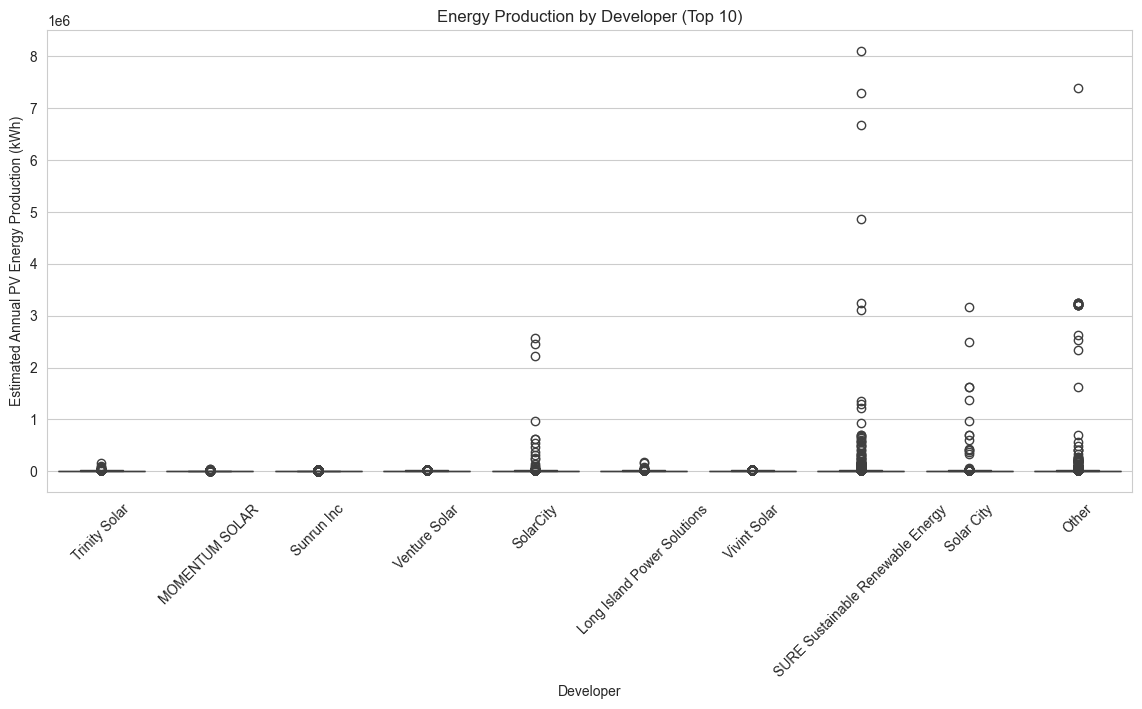

In [219]:
# Boxplot of Energy Production by Developer (Top 10 developers with most projects)
top_developers = df["Developer"].value_counts().index[:10]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df["Developer"].isin(top_developers)], x="Developer", y="Estimated Annual PV Energy Production (kWh)")
plt.xticks(rotation=45)
plt.xlabel("Developer")
plt.ylabel("Estimated Annual PV Energy Production (kWh)")
plt.title("Energy Production by Developer (Top 10)")
plt.show()

Some developers have a much wider range of energy production, while others maintain more consistent outputs.
There are significant outliers, indicating a few very large projects.

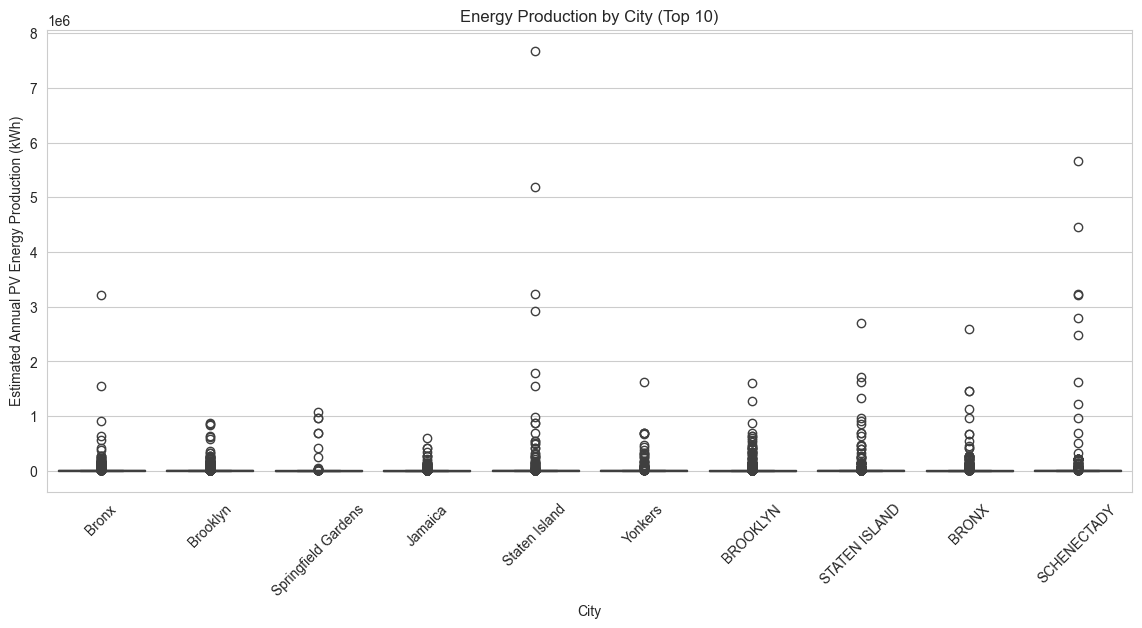

In [221]:
# Boxplot of Energy Production by City (Top 10 cities with most projects)
top_cities = df["City/Town"].value_counts().index[:10]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df["City/Town"].isin(top_cities)], x="City/Town", y="Estimated Annual PV Energy Production (kWh)")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Estimated Annual PV Energy Production (kWh)")
plt.title("Energy Production by City (Top 10)")
plt.show()

Different cities show varying distributions of solar energy production.
Some cities have high median production, while others have more variability.

#### OUTLIER DETECTION

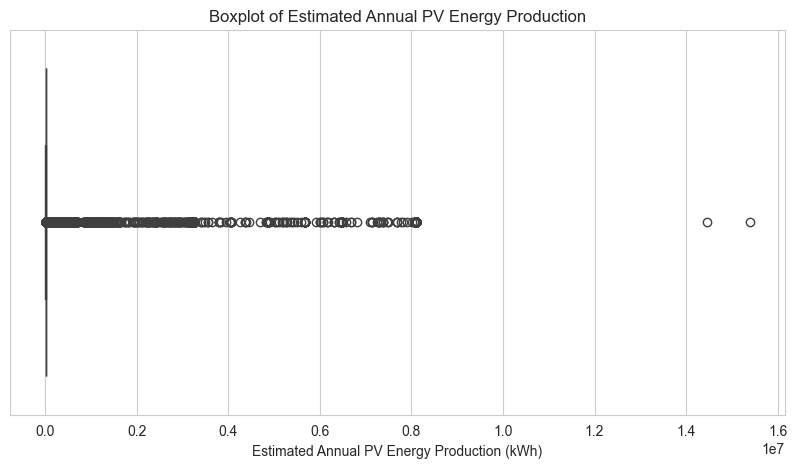

In [224]:
# Boxplot to detect outliers in energy production
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Estimated Annual PV Energy Production (kWh)"])
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.title("Boxplot of Estimated Annual PV Energy Production")
plt.show()

The boxplot indicates the presence of outliers—projects with significantly higher energy production compared to the majority.

In [227]:
# Outlier removal using IQR method
Q1 = df[["Estimated PV System Size (kWdc)", "Estimated Annual PV Energy Production (kWh)"]].quantile(0.25)
Q3 = df[["Estimated PV System Size (kWdc)", "Estimated Annual PV Energy Production (kWh)"]].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[
    (df["Estimated PV System Size (kWdc)"] >= lower_bound["Estimated PV System Size (kWdc)"]) &
    (df["Estimated PV System Size (kWdc)"] <= upper_bound["Estimated PV System Size (kWdc)"]) &
    (df["Estimated Annual PV Energy Production (kWh)"] >= lower_bound["Estimated Annual PV Energy Production (kWh)"]) &
    (df["Estimated Annual PV Energy Production (kWh)"] <= upper_bound["Estimated Annual PV Energy Production (kWh)"])
]

# Compare sizes before and after filtering
df.shape, df_filtered.shape


((215204, 12), (202764, 12))

#### FEATURUE SELECTION

For clustering, we need to determine the best features. Since the dataset does not contain latitude or longitude values. We'll have to rely on county or zip codes for location-based clustering.

Use County (or Zip if needed) for geographic grouping.
Use Estimated Annual PV Energy Production (kWh) and Estimated PV System Size (kWdc) as energy-based features.

In [230]:
# Select relevant features
df_cluster = df[["County", "Estimated Annual PV Energy Production (kWh)", "Estimated PV System Size (kWdc)"]].copy()

In [231]:
# Drop rows with missing county values (since it's essential for location)
df_cluster = df_cluster.dropna(subset=["County"])

In [232]:
# Encode County as a numerical value
label_encoder = LabelEncoder()
df_cluster["County_encoded"] = label_encoder.fit_transform(df_cluster["County"])

In [233]:
# Handle missing values in numerical columns (if any) using median imputation
imputer = SimpleImputer(strategy="median")
df_cluster[["Estimated Annual PV Energy Production (kWh)", "Estimated PV System Size (kWdc)"]] = imputer.fit_transform(
    df_cluster[["Estimated Annual PV Energy Production (kWh)", "Estimated PV System Size (kWdc)"]]
)

In [234]:
# Drop original County column since we now have it encoded
df_cluster = df_cluster.drop(columns=["County"])

# Display the first few rows of the processed data
df_cluster.head()

,Estimated Annual PV Energy Production (kWh),Estimated PV System Size (kWdc),County_encoded
0,7100.0,6.05,40
1,7911.0,6.74,2
2,3585.0,3.05,23
3,6592.0,5.62,23
4,7100.0,6.05,40


In [236]:
# Normalize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

### CLUSTERING

##### ELBOW METHODE

In [241]:
# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

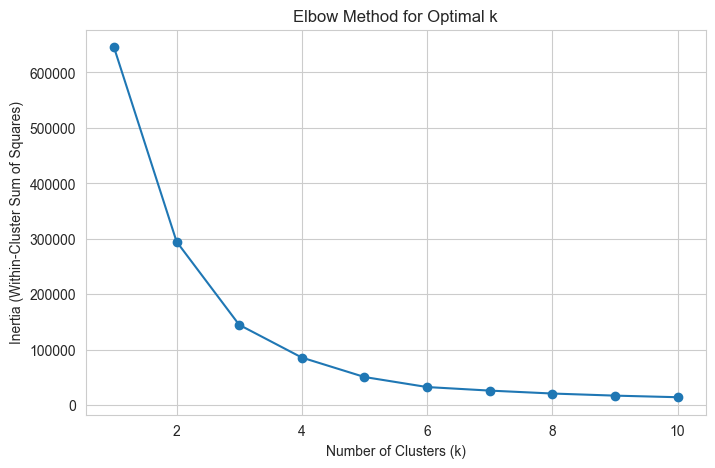

In [243]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [256]:
# Automatically detecting the elbow point using the "knee" method
from kneed import KneeLocator

# Find the optimal number of clusters
knee_locator = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow

optimal_k


3

So, from the elbow methode we get optimal number of clustering k=3. 

## K Means CLUSTERING

In [260]:
# Based on the elbow method, choosing an optimal k (assuming around 4-6 as a good choice)
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Show cluster distribution
df_cluster["Cluster"].value_counts()


Cluster
0    135443
2     79230
1       531
Name: count, dtype: int64

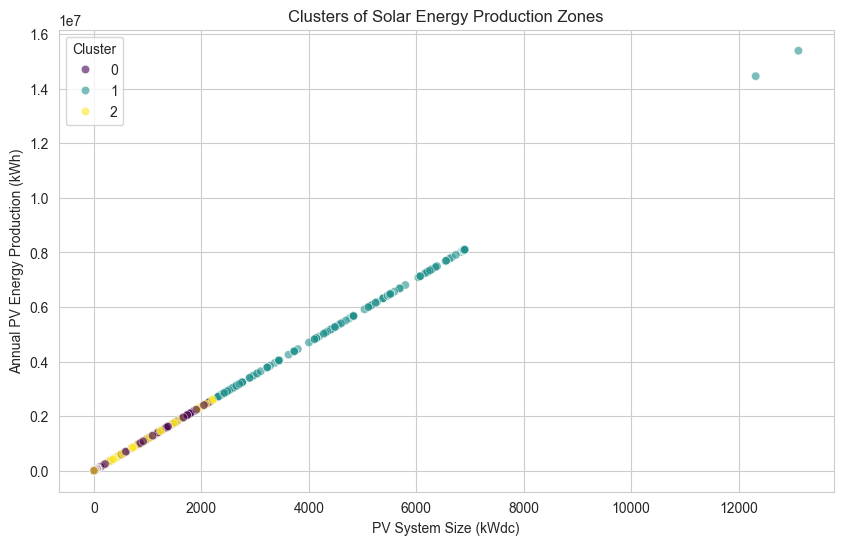

array([[-0.04574474, -0.04574473,  0.64073769],
       [18.1517735 , 18.15177385, -0.43929794],
       [-0.04345308, -0.04345308, -1.09239137]])

In [262]:
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cluster["Estimated PV System Size (kWdc)"],
    y=df_cluster["Estimated Annual PV Energy Production (kWh)"],
    hue=df_cluster["Cluster"],
    palette="viridis",
    alpha=0.6
)
plt.xlabel("PV System Size (kWdc)")
plt.ylabel("Annual PV Energy Production (kWh)")
plt.title("Clusters of Solar Energy Production Zones")
plt.legend(title="Cluster")
plt.show()

# Display cluster centers
kmeans.cluster_centers_

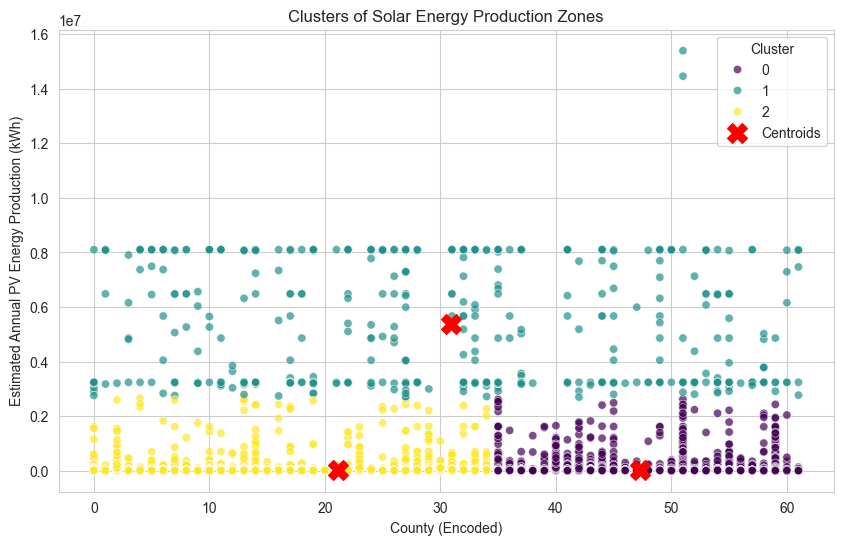

In [263]:
# Compute centroids (mean of each cluster)
centroids = df_cluster.groupby("Cluster")[["County_encoded", "Estimated Annual PV Energy Production (kWh)"]].mean()

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cluster["County_encoded"],
    y=df_cluster["Estimated Annual PV Energy Production (kWh)"],
    hue=df_cluster["Cluster"],
    palette="viridis",
    alpha=0.7
)

# Mark Centroids
plt.scatter(centroids["County_encoded"], centroids["Estimated Annual PV Energy Production (kWh)"],
            color='red', marker='X', s=200, label="Centroids")

plt.xlabel("County (Encoded)")
plt.ylabel("Estimated Annual PV Energy Production (kWh)")
plt.title("Clusters of Solar Energy Production Zones")
plt.legend(title="Cluster")
plt.show()

In [91]:
from sklearn.metrics import silhouette_score,silhouette_samples

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, df_cluster["Cluster"])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.3f}")

Silhouette Score for K-Means: 0.624


In [94]:
silhouette_scores = []
K_range = range(2, 11)  # Testing k values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is {score}")
    silhouette_scores.append(score)

For n_clusters = 2, the average silhouette_score is 0.9546267858541123
For n_clusters = 3, the average silhouette_score is 0.6243994184230883
For n_clusters = 4, the average silhouette_score is 0.6250329315020883
For n_clusters = 5, the average silhouette_score is 0.6286711368661576
For n_clusters = 6, the average silhouette_score is 0.6976441590596434
For n_clusters = 7, the average silhouette_score is 0.7029934971211373
For n_clusters = 8, the average silhouette_score is 0.703150690089679
For n_clusters = 9, the average silhouette_score is 0.7121326824250955
For n_clusters = 10, the average silhouette_score is 0.7193574446431183


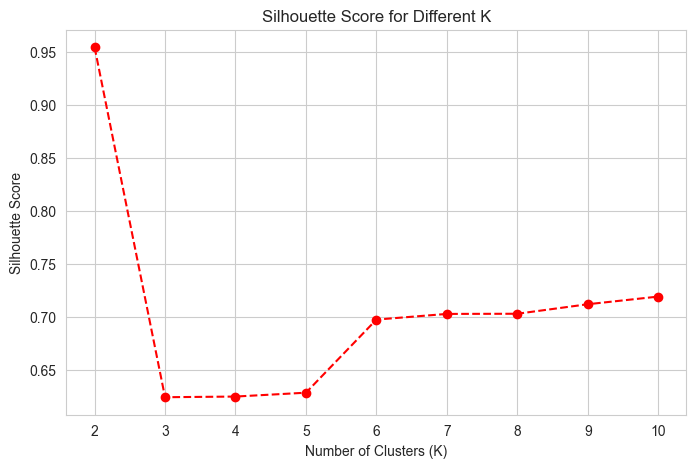

In [117]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.show()

In [121]:
# Select the best K based on both Elbow and Silhouette analysis
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {best_k}")

Optimal number of clusters: 2


In [123]:
# Summary of clusters
cluster_summary = df_cluster.groupby('Cluster').agg({
    'County_encoded': 'nunique',  # Number of unique counties in each cluster
    'Estimated Annual PV Energy Production (kWh)': ['mean', 'median', 'min', 'max']
}).rename(columns={'County': 'Unique Counties', 'Zip': 'Unique Zip Codes'})

cluster_summary

County_encoded Estimated Annual PV Energy Production (kWh)             \
               nunique                                        mean     median   
Cluster                                                                         
0                   27                                1.345380e+04     8570.0   
1                   56                                5.364286e+06  4859698.0   
2                   35                                1.412765e+04     8240.0   

                                
               min         max  
Cluster                         
0             14.0   2624237.0  
1        2697132.0  15389042.0  
2            137.0   2682877.0

### Clustering Evaluation Metrix

In [266]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [268]:
X = df_cluster.drop(columns=['Cluster'], axis=1)
y = df_cluster['Cluster']

In [272]:
kmeans = KMeans(n_clusters=3).fit(X)
df_cluster['Cluster'] = kmeans.labels_

# Calculate metrics
dbi = davies_bouldin_score(X, df_cluster['Cluster'])
chi = calinski_harabasz_score(X, df_cluster['Cluster'])

print(f'Davies-Bouldin Index: {dbi}')
print(f'Calinski-Harabasz Index: {chi}')

Davies-Bouldin Index: 0.2553680110163137
Calinski-Harabasz Index: 2206730.4232777106


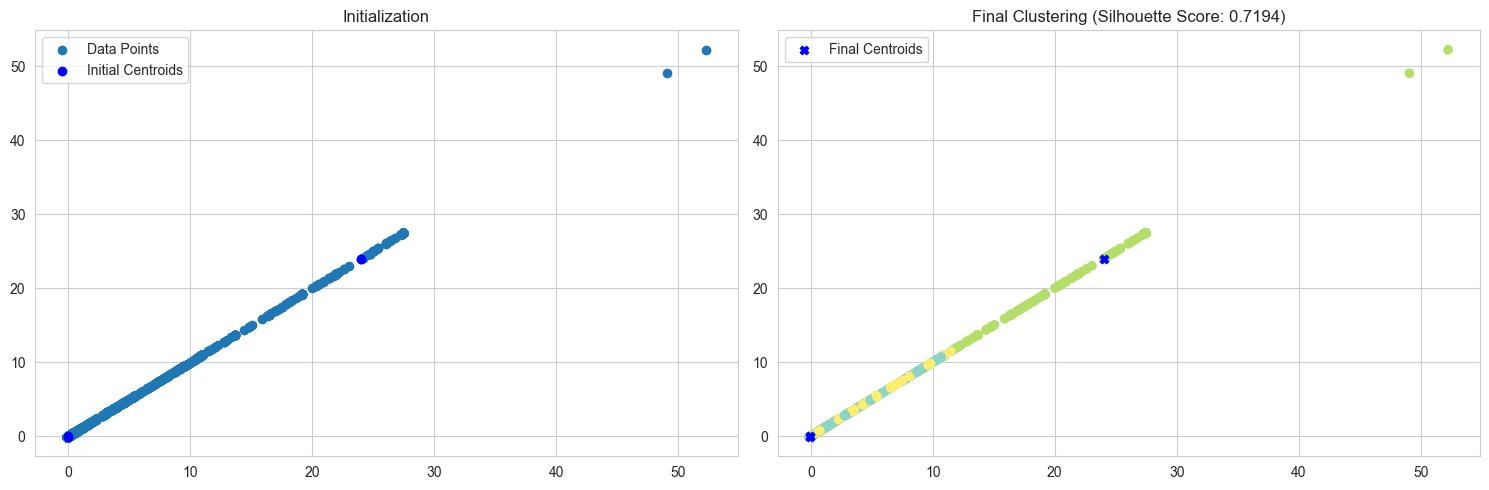

In [276]:
# Evaluation of K-means Clustering (3 Clusters) Using Silhouette Score

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_scaled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

ax = axes[0]
ax.scatter(df_scaled[:, 0],df_scaled[:, 1], label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()

ax = axes[1]
# Assign cluster labels to each data point
cluster_labels = kmeans.predict(df_scaled)
# Use cluster labels as color values
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='Set3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='X', label='Final Centroids')
ax.set_title(f'Final Clustering (Silhouette Score: {score:.4f})')
ax.legend()

plt.tight_layout()
plt.show()

In [278]:
# Map cluster labels back to counties
df_cluster["County"] = label_encoder.inverse_transform(df_cluster["County_encoded"])

In [280]:
## Geographical Analysis
county_cluster_distribution = df_cluster.groupby(["County", "Cluster"]).size().unstack(fill_value=0)
print("County-wise Cluster Distribution:\n", county_cluster_distribution)


County-wise Cluster Distribution:
 Cluster          0  1   2
County                   
Albany        4260  1  13
Allegany       150  7   1
Bronx         5819  0   3
Broome         536  2   3
Cattaraugus    274  6   4
...            ... ..  ..
Washington     791  2   4
Wayne          509  0  14
Westchester  12243  0  11
Wyoming        185  3   3
Yates          187  4   2

[62 rows x 3 columns]


#### Cluster Insights:

Cluster 0: Represents regions with low solar energy production, likely due to less sunlight exposure, smaller installations, or lower investment in solar infrastructure.
Cluster 1: Includes areas with moderate energy production, possibly due to well-established but not highly optimized solar projects.
Cluster 2: Comprises high-production zones, indicating optimal conditions, large-scale installations, or advanced solar technologies.

#### Key Findings:

Solar energy production varies significantly by region, suggesting that factors such as climate, government policies, and technology adoption influence output.

High-performing regions (Cluster 2) can serve as benchmarks for improving underperforming areas.

Low-production zones (Cluster 0) may require targeted incentives, better technology, or policy interventions to improve efficiency.

#### Recommendations:

##### Policy & Investment:

Encourage investment in low-production areas to improve solar infrastructure.

Implement incentive programs to promote higher adoption of solar energy in weaker zones.

##### Technology Adoption:

Study high-performing regions to replicate their success in other areas.

Introduce advanced photovoltaic (PV) systems in low-production zones.

##### Further Research:

Incorporate additional factors such as weather patterns, land use, and government incentives for deeper analysis.

Utilize geospatial mapping to visualize clusters more effectively.

## Final Conclusion
The Clustering Solar Energy Production Zones project successfully identified distinct geographical regions based on their solar energy production levels. By applying K-Means clustering, we categorized areas into low, moderate, and high production zones, revealing significant variations in energy output across different locations.

The findings suggest that high-performing regions can serve as benchmarks for improving underperforming areas. Low-production zones may require better infrastructure, technological advancements, or policy support to enhance their solar output. This clustering approach provides valuable insights for policymakers, investors, and energy planners to optimize solar energy distribution and improve efficiency.

By leveraging these insights, stakeholders can strategically invest in solar projects, enhance energy policies, and promote sustainable energy growth for a more efficient and greener future.